In [1]:
pip install librosa

  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.3 MB/s eta 0:00:00a 0:00:01
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 11.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
main='/Users/deha/Desktop/python/audio/'

In [4]:
import os

In [9]:
for f in os.listdir(file+'down/'):
    print(f)

00b01445_nohash_0.wav
00b01445_nohash_1.wav
00176480_nohash_0.wav
00f0204f_nohash_0.wav
0132a06d_nohash_2.wav
0132a06d_nohash_3.wav
004ae714_nohash_0.wav
0132a06d_nohash_1.wav
0132a06d_nohash_0.wav
0132a06d_nohash_4.wav


In [10]:
sample=file+'down/00b01445_nohash_0.wav'

In [11]:
import librosa

In [17]:
x,sr=librosa.load(sample,sr=None)

In [18]:
x

array([0.00045776, 0.00088501, 0.00045776, ..., 0.02966309, 0.03326416,
       0.02850342], shape=(16000,), dtype=float32)

In [19]:
sr

16000

In [22]:
from IPython.display import Audio

In [23]:
Audio(sample)

In [24]:
import matplotlib.pyplot as plt
import librosa.display

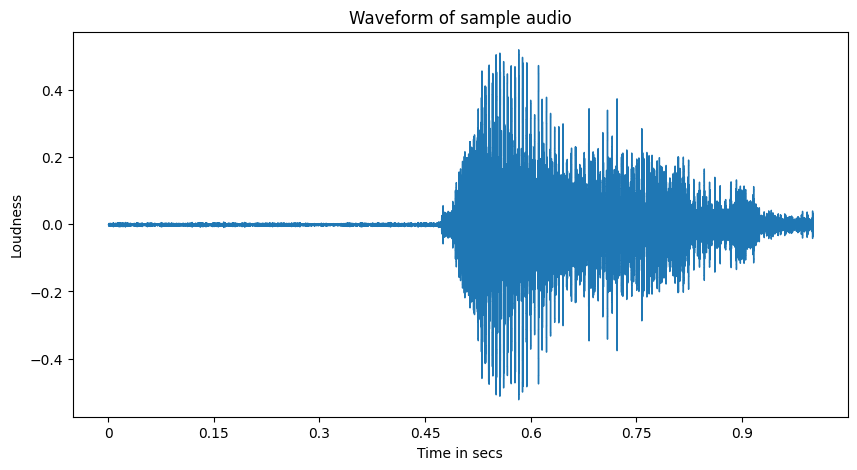

In [28]:
plt.figure(figsize=(10,5))
librosa.display.waveshow(x,sr=sr)
plt.title('Waveform of sample audio')
plt.xlabel('Time in secs')
plt.ylabel('Loudness')
plt.show()

In [31]:
X=librosa.stft(x) #numpy array

In [32]:
X_to_db=librosa.amplitude_to_db(X) #converting to energy levels(dB)

/var/folders/g6/hj_lnk1s6_vgcxt9232v2c3m0000gn/T/ipykernel_9297/1854371957.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  X_to_db=librosa.amplitude_to_db(X)


array([[-45.529274, -45.529274, -45.529274, ..., -45.529274, -36.708256,
        -27.132431],
       [-45.529274, -45.529274, -45.529274, ..., -45.529274, -37.53367 ,
        -26.97131 ],
       [-45.529274, -45.529274, -45.529274, ..., -45.529274, -35.721054,
        -26.615501],
       ...,
       [-45.529274, -45.529274, -45.529274, ..., -45.529274, -45.529274,
        -38.04424 ],
       [-45.529274, -45.529274, -45.529274, ..., -45.529274, -45.529274,
        -38.11495 ],
       [-45.529274, -45.529274, -45.529274, ..., -45.529274, -45.529274,
        -38.192955]], shape=(1025, 32), dtype=float32)

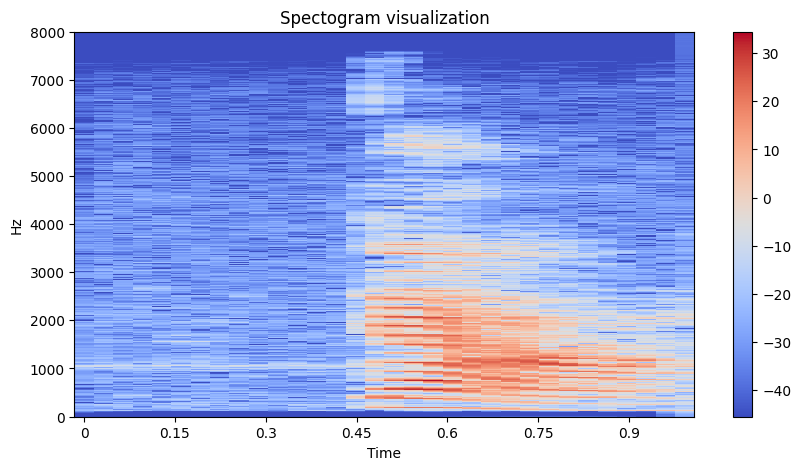

In [36]:
plt.figure(figsize=(10,5))
librosa.display.specshow(X_to_db,sr=sr,x_axis='time',y_axis='hz')
plt.title('Spectogram visualization')
plt.colorbar()

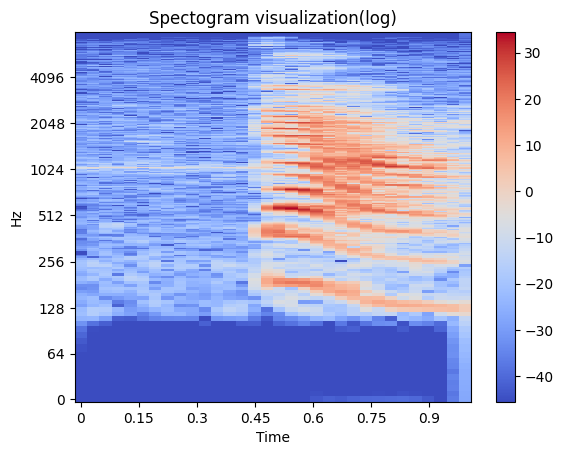

In [38]:
librosa.display.specshow(X_to_db,sr=sr,x_axis='time',y_axis='log')
plt.title('Spectogram visualization(log)')
plt.colorbar()

In [41]:
folders=[f for f in os.listdir(file) if f!='.DS_Store']
folders

['eight', 'nine', 'one', 'seven', 'down', 'five', 'four']

In [47]:
import numpy as np

In [51]:
inp,out=[],[]
for i in folders:
    sub_fold=os.path.join(main,i)
    for j in os.listdir(sub_fold):
        if j.endswith('.wav'):
            file_p=os.path.join(sub_fold,j)
            try:
                y,sr=librosa.load(file_p,sr=None)
                mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)
                mfcc_mean=np.mean(mfcc,axis=1)
                inp.append(mfcc_mean)
                out.append(i)
            except Exception as e:
                print(e)

In [54]:
inp=np.array(inp)

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()
x_sc=scaler.fit_transform(inp)

In [59]:
from sklearn.cluster import KMeans

In [61]:
model=KMeans(n_clusters=len(set(out)),random_state=26)

In [62]:
pred=model.fit_predict(x_sc)

In [68]:
pred

array([2, 1, 1, 3, 1, 1, 1, 4, 4, 6, 2, 1, 5, 1, 5, 5, 4, 5, 4, 4, 5, 0,
       5, 5, 3, 5, 5, 5, 6, 6, 1, 1, 3, 3, 1, 1, 3, 1, 5, 4, 2, 2, 0, 0,
       1, 5, 3, 1, 1, 1, 2, 2, 0, 5, 5, 3, 1, 1, 4, 4, 0, 0, 5, 5, 3, 5,
       4, 3, 5, 6], dtype=int32)

In [70]:
for i, label in enumerate(out):
    print(f"File from class '{label}' was assigned to cluster {pred[i]}")

File from class 'eight' was assigned to cluster 2
File from class 'eight' was assigned to cluster 1
File from class 'eight' was assigned to cluster 1
File from class 'eight' was assigned to cluster 3
File from class 'eight' was assigned to cluster 1
File from class 'eight' was assigned to cluster 1
File from class 'eight' was assigned to cluster 1
File from class 'eight' was assigned to cluster 4
File from class 'eight' was assigned to cluster 4
File from class 'eight' was assigned to cluster 6
File from class 'nine' was assigned to cluster 2
File from class 'nine' was assigned to cluster 1
File from class 'nine' was assigned to cluster 5
File from class 'nine' was assigned to cluster 1
File from class 'nine' was assigned to cluster 5
File from class 'nine' was assigned to cluster 5
File from class 'nine' was assigned to cluster 4
File from class 'nine' was assigned to cluster 5
File from class 'nine' was assigned to cluster 4
File from class 'nine' was assigned to cluster 4
File from 

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
true_labels = le.fit_transform(out)
true_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [73]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,pred)
print(acc)

0.2857142857142857
